In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno

In [7]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 15

In [8]:
df = pd.read_csv("Seoul/merge_2021.csv", encoding='ms949')

In [9]:
df.head()

,id,순위,마번,마명,산지,성별,연령,중량,기수명,조교사명,...,3코너,G-3F,4코너,G-1F,경주기록,날짜,날씨,주로상태,등급,거리
0,0,1,11,바이스로이,한,거,3세,56.0,이혁,임봉춘,...,00:24.2,00:36.2,00:42.4,,01:13.3,2021년05월16일(일),비,불량,국6등급,1200M
1,1,2,12,탑퀄리티,한,거,3세,56.0,박태종,박종곤,...,00:24.3,00:36.3,00:42.5,,01:14.2,2021년05월16일(일),비,불량,국6등급,1200M
2,2,3,8,유정챔프,한,수,3세,56.0,이철경,서인석,...,00:25.2,00:37.2,00:43.3,,01:14.7,2021년05월16일(일),비,불량,국6등급,1200M
3,3,4,10,방탄여걸,한,암,3세,54.0,하정훈,이관호,...,00:25.3,00:37.4,00:43.6,,01:15.2,2021년05월16일(일),비,불량,국6등급,1200M
4,4,5,6,로열영광,한,수,3세,56.0,문성혁,박병일,...,00:25.5,00:37.6,00:43.9,,01:15.4,2021년05월16일(일),비,불량,국6등급,1200M


<AxesSubplot:>

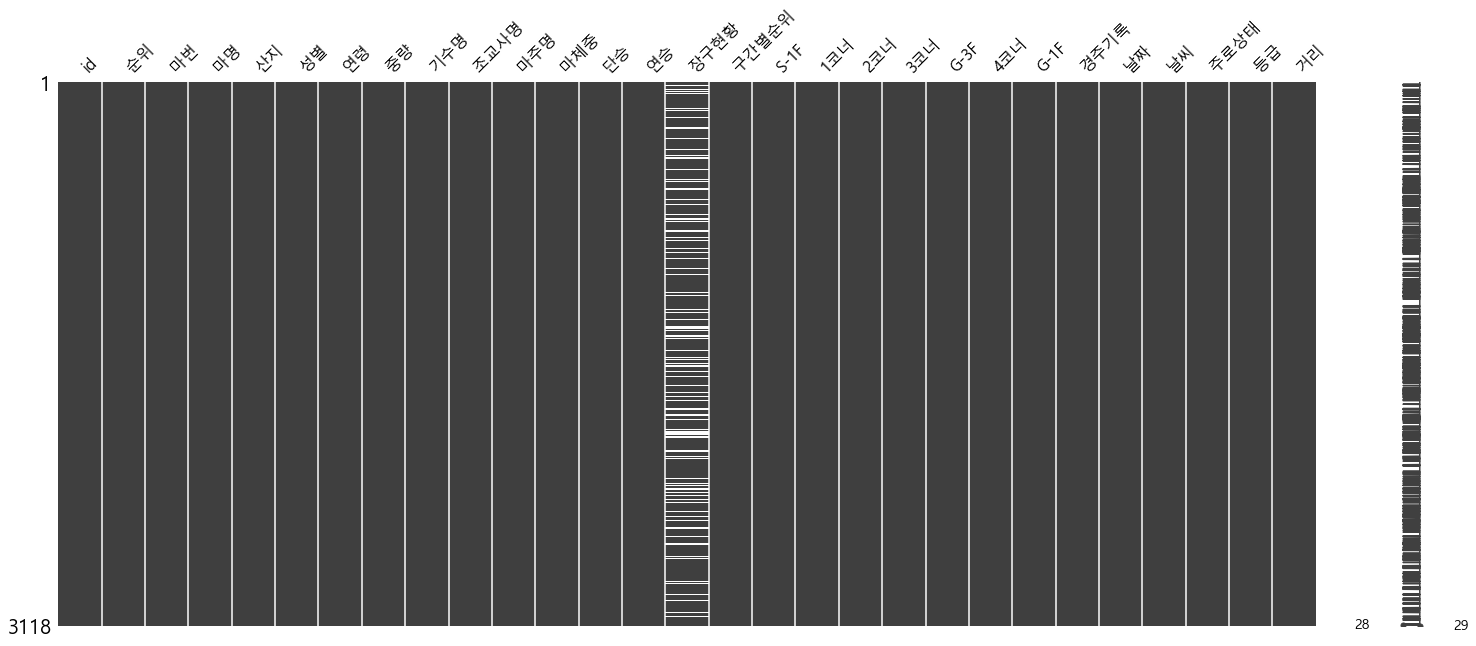

In [10]:
msno.matrix(df)

<AxesSubplot:xlabel='중량', ylabel='count'>

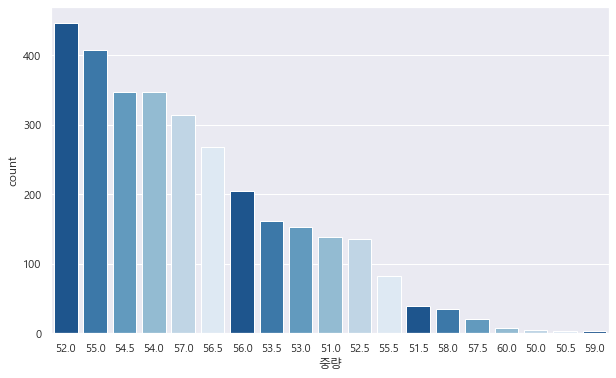

In [11]:
sns.set(style='darkgrid')
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='중량', palette=sns.color_palette("Blues_r"), order=df['중량'].value_counts().index)

<AxesSubplot:xlabel='기수명', ylabel='count'>

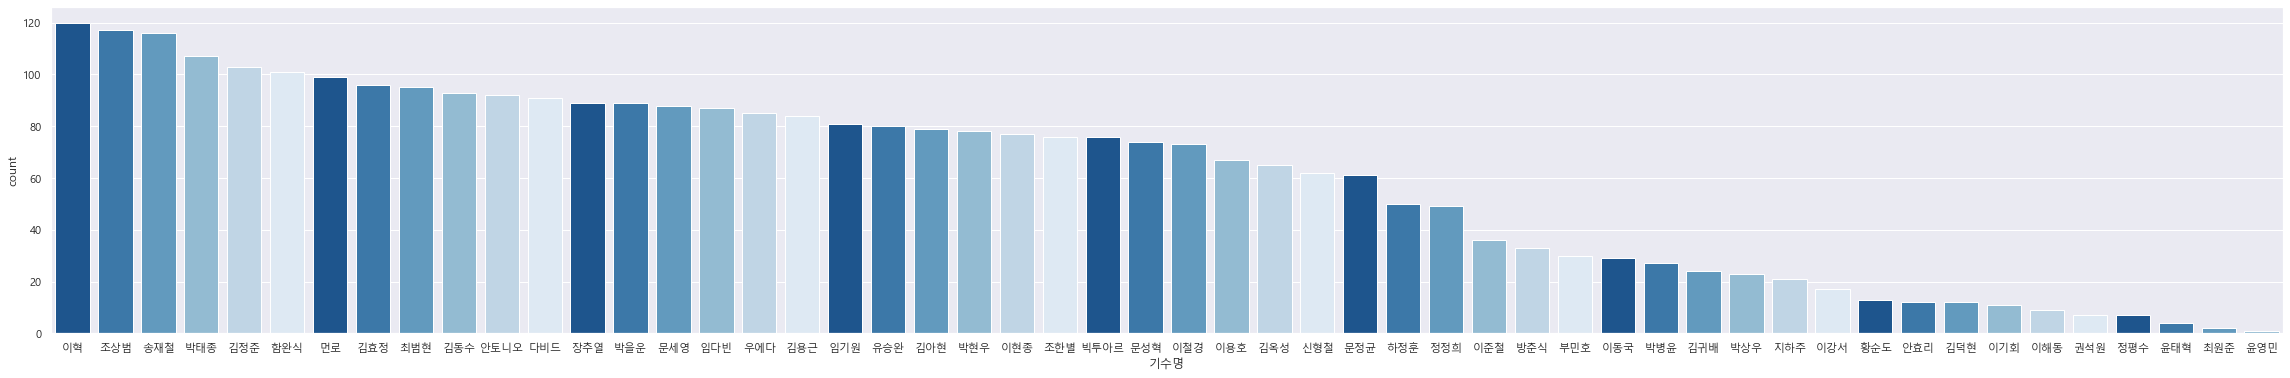

In [15]:
sns.set(style='darkgrid')
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.figure(figsize=(40,6))
sns.countplot(data=df, x='기수명', palette=sns.color_palette("Blues_r"), order=df['기수명'].value_counts().index)

<AxesSubplot:xlabel='등급', ylabel='순위'>

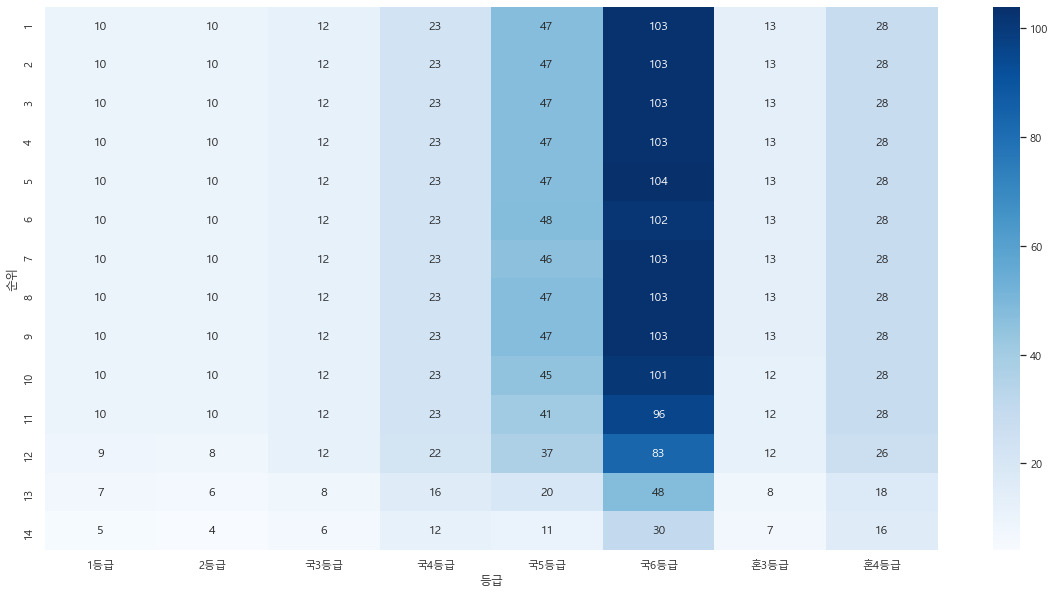

In [16]:
df_p = df.pivot_table(index="순위", columns="등급", aggfunc='size')
df_p = df_p.fillna(0)
plt.figure(figsize=(20,10))
sns.heatmap(df_p, cmap="Blues", annot=True, fmt='.0f')

In [23]:
raw1 = pd.read_csv("Seoul/merge_2021.csv", encoding='ms949', engine='python')
raw1.head()

,id,순위,마번,마명,산지,성별,연령,중량,기수명,조교사명,...,3코너,G-3F,4코너,G-1F,경주기록,날짜,날씨,주로상태,등급,거리
0,0,1,11,바이스로이,한,거,3세,56.0,이혁,임봉춘,...,00:24.2,00:36.2,00:42.4,,01:13.3,2021년05월16일(일),비,불량,국6,1200M
1,1,2,12,탑퀄리티,한,거,3세,56.0,박태종,박종곤,...,00:24.3,00:36.3,00:42.5,,01:14.2,2021년05월16일(일),비,불량,국6,1200M
2,2,3,8,유정챔프,한,수,3세,56.0,이철경,서인석,...,00:25.2,00:37.2,00:43.3,,01:14.7,2021년05월16일(일),비,불량,국6,1200M
3,3,4,10,방탄여걸,한,암,3세,54.0,하정훈,이관호,...,00:25.3,00:37.4,00:43.6,,01:15.2,2021년05월16일(일),비,불량,국6,1200M
4,4,5,6,로열영광,한,수,3세,56.0,문성혁,박병일,...,00:25.5,00:37.6,00:43.9,,01:15.4,2021년05월16일(일),비,불량,국6,1200M


In [24]:
raw = raw1[["순위","마번","마명","산지","성별","연령","중량", "기수명", "조교사명", "마체중",
 "단승","연승","S-1F", "3코너", "4코너", "G-3F", "날씨", "등급", "거리"]]
raw.head()

,순위,마번,마명,산지,성별,연령,중량,기수명,조교사명,마체중,단승,연승,S-1F,3코너,4코너,G-3F,날씨,등급,거리
0,1,11,바이스로이,한,거,3세,56.0,이혁,임봉춘,463,2.6,1.4,00:13.4,00:24.2,00:42.4,00:36.2,비,국6,1200M
1,2,12,탑퀄리티,한,거,3세,56.0,박태종,박종곤,473,2.0,1.0,00:13.5,00:24.3,00:42.5,00:36.3,비,국6,1200M
2,3,8,유정챔프,한,수,3세,56.0,이철경,서인석,483,30.6,5.2,00:14.0,00:25.2,00:43.3,00:37.2,비,국6,1200M
3,4,10,방탄여걸,한,암,3세,54.0,하정훈,이관호,423,13.1,5.0,00:14.2,00:25.3,00:43.6,00:37.4,비,국6,1200M
4,5,6,로열영광,한,수,3세,56.0,문성혁,박병일,458,19.8,1.2,00:14.2,00:25.5,00:43.9,00:37.6,비,국6,1200M
